### Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

In [1]:
import numpy as np
from scipy.spatial import distance
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('3.10_non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

c:\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
def gradient(X, y, w, lam) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    xy = np.multiply(X, error)+lam*2*w
    grad = np.multiply(X, error).sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

In [12]:
def eval_w_next(X, y, eta, w_current, lam):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current, lam)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    dist = np.linalg.norm(w_current - w_next)
    weight_evolution = np.linalg.norm(w_current - w_next)
    return (w_next, weight_evolution, grad)

In [13]:
def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001, lam=1) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w,lam)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w,lam)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

step 100 |w-w_next|=0.00377, grad=[-0.452958    0.13085057]
step 200 |w-w_next|=0.00310, grad=[-0.37275083  0.1076803 ]
step 300 |w-w_next|=0.00255, grad=[-0.30674628  0.0886129 ]
step 400 |w-w_next|=0.00210, grad=[-0.25242943  0.07292184]
step 500 |w-w_next|=0.00173, grad=[-0.20773069  0.06000926]
step 600 |w-w_next|=0.00142, grad=[-0.17094694  0.04938317]
step 700 |w-w_next|=0.00117, grad=[-0.14067665  0.04063869]


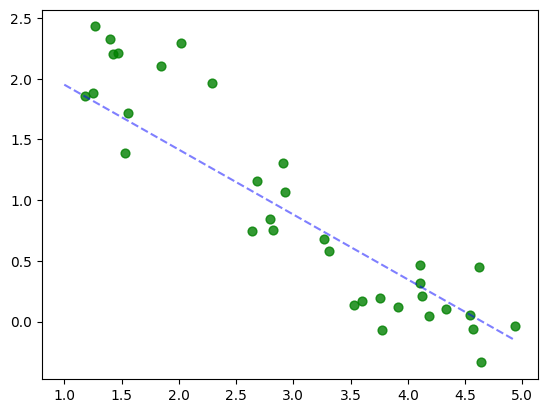

In [14]:
# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

support = np.linspace(X.min(), X.max(), num=100)
# делаем предикт - считаем предсказания модели в каждой точке обучающей выборки в виде y=X*w
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.show()